In [20]:
#Importing required Libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [21]:
#import and analyse dataset 
source_data = pd.read_csv('Iris.csv') 
#print(source_data.info())
#This Dataset contains 5 columns containing values of corresponding estimates of iris flower and the species
#Now removing the string column and checking for any correlation:
correlation = source_data.select_dtypes(exclude="object")
print(correlation.corr()) 
#we can see that petal length and petal width have a correlation of 0.96 , therefore we will consider them as datasets for the regression model 

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [22]:
x = source_data["PetalLengthCm"]
y = source_data["PetalWidthCm"]
print(x.to_string(),y.to_string)
# We can observe that there are no null rows nor any outliers , so this data does not need any correction 

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
5      1.7
6      1.4
7      1.5
8      1.4
9      1.5
10     1.5
11     1.6
12     1.4
13     1.1
14     1.2
15     1.5
16     1.3
17     1.4
18     1.7
19     1.5
20     1.7
21     1.5
22     1.0
23     1.7
24     1.9
25     1.6
26     1.6
27     1.5
28     1.4
29     1.6
30     1.6
31     1.5
32     1.5
33     1.4
34     1.5
35     1.2
36     1.3
37     1.5
38     1.3
39     1.5
40     1.3
41     1.3
42     1.3
43     1.6
44     1.9
45     1.4
46     1.6
47     1.4
48     1.5
49     1.4
50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4

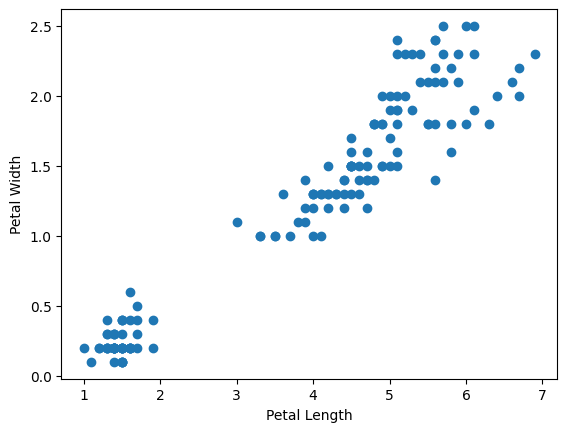

In [23]:
# Creating a graph to visualise the data 
plt.scatter(x,y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [24]:
def rmse_metric(actual, predicted):
 sum_error = 0.0
 for y, y_hat in zip(actual,predicted) :
    prediction_error = y - y_hat
    sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [25]:
# Calculate coefficients
def compute_coefficient(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0

    for i in range(n):
        numerator += (x[i] - x_mean) * (y[i] - y_mean)
        denominator += (x[i] - x_mean) ** 2

    
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

In [26]:
# Predict value of y 
def predict(x, w1, w0):
    return w1 * x + w0

In [28]:
#predict co-efficients and display the  values of co-effiecients
w1, w0 = compute_coefficient(x, y)
y_hat = predict(x,w1,w0)

print(w1,w0)

0.4164191322854012 -0.3665140452167275


In [29]:
# Evaluation by calculating root-mean squared value
def evaluate_ols(y,y_hat):
    mse = np.mean((y - y_hat) ** 2)
    return mse,np.sqrt(mse)
print(evaluate_ols(y,y_hat)) 

(0.04228994631948424, 0.20564519522586527)


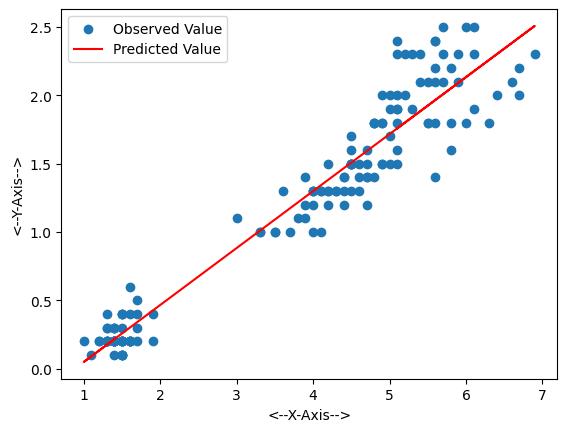

In [31]:
# Plot predicted line vs actual values 
plt.scatter(x, y, label='Observed Value')
plt.plot(x, y_hat, label='Predicted Value', color='red')
plt.xlabel('<--X-Axis-->')
plt.ylabel('<--Y-Axis-->')
plt.legend()
plt.show()